## Implementation of a Perceptron in Python

References:
* Sebastian Raschka, Yuxi Hayden Liu, and Vahid Mirjalili. Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing Ltd, 2022.

In [1]:
from IPython.display import Image
from IPython.display import display

In [2]:
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_2025/webpage-src/NNDL_2025/NNDL_2025/images/perceptron_flowchart.png", width=700))

### Perceptron Class Definition

In [4]:
import numpy as np


class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        print(self.w_)
        self.b_ = np.float_(0.)

        self.errors_ = []
        self.tmpw_ = []
        self.tmpb_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.tmpw_.append(self.w_.copy()) # saved to show evolution
            self.tmpb_.append(self.b_)        # of decision boundary
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

### Using the Iris Dataset

In [5]:
import os
import pandas as pd

from urllib.error import HTTPError

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
num_unique_values = df[4].nunique()
print(f"Number of unique categories: {num_unique_values}")
unique_values = df[4].unique()
print(f"Unique categories: {unique_values}")

Number of unique categories: 3
Unique categories: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Plotting the Iris Dataset

(50, 2)
(50, 2)


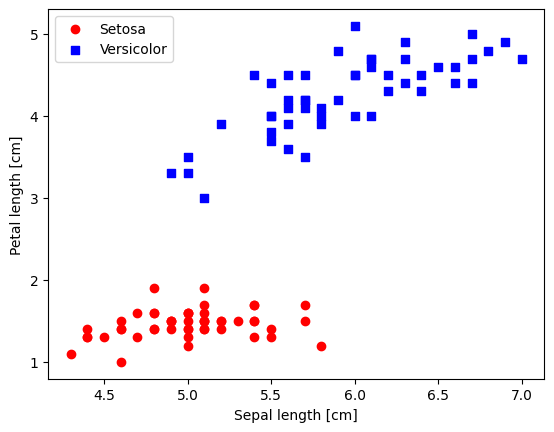

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



# select setosa and versicolor
#y = df.iloc[0:100, 4].values

y = df.iloc[:, 4].values
X = df.iloc[:, [0, 2]].values  # extract sepal length and petal length

# Map y values to 0, 1, or -1
y_mapped = np.select(
    [y == 'Iris-setosa', y == 'Iris-versicolor'],  # Conditions
    [0, 1],                                        # Values to assign if the condition is True
    default=-1                                     # Value to assign if none of the conditions are True
)


mask = (y_mapped == 0) | (y_mapped == 1)  # Mask for selecting only 0 and 1 in y_mapped


X_filtered = X[mask]
y_filtered = y_mapped[mask]


# Filter the first 50 occurrences of category 0
mask_0 = (y_filtered == 0)
X_0 = X_filtered[mask_0][:50]

# Filter the first 50 occurrences of category 1
mask_1 = (y_filtered == 1)
X_1 = X_filtered[mask_1][:50]


print(np.shape(X_0))
print(np.shape(X_1))


# plot data
plt.scatter(X_0[:, 0], X_0[:, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X_1[:, 0], X_1[:, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')



### Training the Perceptron Model

[ 0.00469112 -0.00282863]


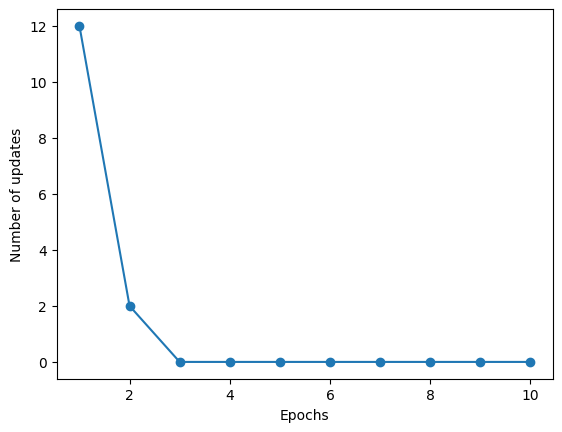

1


In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10, random_state=123456)

ppn.fit(X_filtered, y_filtered)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

print(ppn.predict(X_filtered[-80]))

### Plotting Decision Regions

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

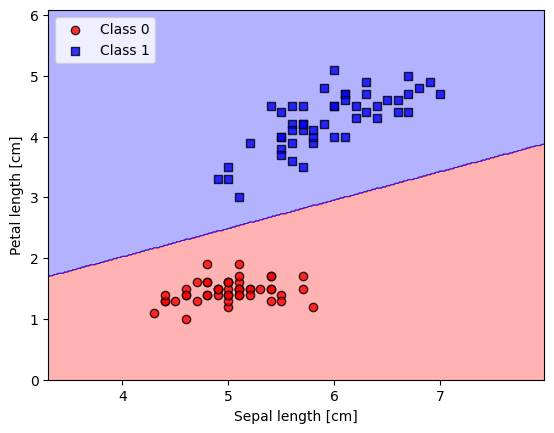

In [ ]:
plot_decision_regions(X_filtered, y_filtered, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')


plt.show()

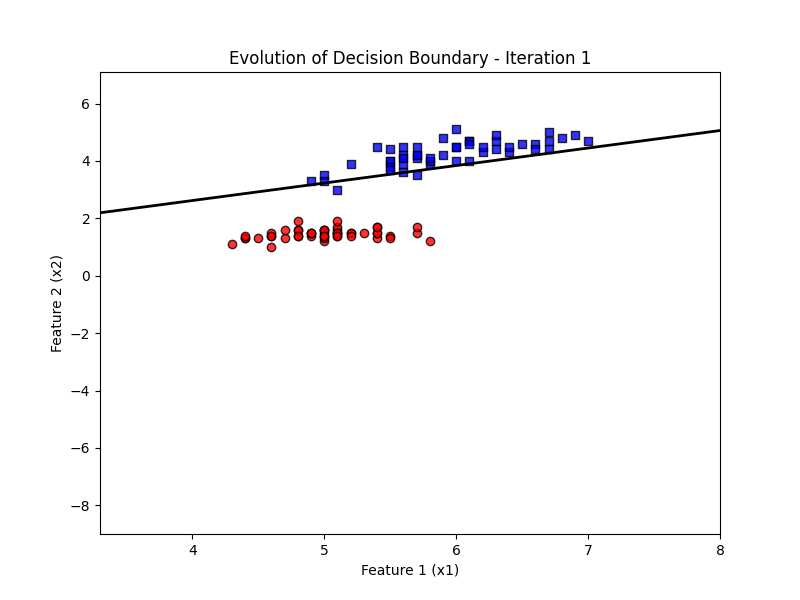

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import ListedColormap

# Example data (replace these with your actual data)
# X_filtered = np.array(...)  # Your filtered data points
# y_filtered = np.array(...)  # Your filtered labels
# ppn.tmpw_ = [...]           # List of weight vectors for each iteration
# ppn.tmpb_ = [...]           # List of biases for each iteration

# Set up marker generator and color map
markers = ('o', 's', '^', 'v', '<')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_filtered))])

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the scattered data points
for idx, cl in enumerate(np.unique(y_filtered)):
    ax.scatter(x=X_filtered[y_filtered == cl, 0],
               y=X_filtered[y_filtered == cl, 1],
               alpha=0.8,
               c=colors[idx],
               marker=markers[idx],
               label=f'Class {cl}',
               edgecolor='black')

# Initialize an empty line for the decision boundary
line, = ax.plot([], [], 'k-', lw=2)

# Set the plot limits
ax.set_xlim(X_filtered[:, 0].min() - 1, X_filtered[:, 0].max() + 1)
ax.set_ylim(X_filtered[:, 1].min() - 10, X_filtered[:, 1].max() + 2)

# Add labels, legend, and title
ax.set_xlabel('Feature 1 (x1)')
ax.set_ylabel('Feature 2 (x2)')
ax.set_title('Evolution of Decision Boundary')

# Update function for animation
def update(frame):
    w = ppn.tmpw_[frame]
    b = ppn.tmpb_[frame]

    # Calculate decision boundary
    x1_range = np.linspace(X_filtered[:, 0].min() - 1, X_filtered[:, 0].max() + 1, 100)
    x2_boundary = -(w[0] * x1_range + b) / w[1]

    # Update the line for the decision boundary
    line.set_data(x1_range, x2_boundary)
    ax.set_title(f'Evolution of Decision Boundary - Iteration {frame + 1}')
    return line,


# Create the directory if it doesn't exist
if not os.path.exists('/tmpcontent'):
    os.makedirs('/tmpcontent')

# Create the animation
ani = FuncAnimation(fig, update, frames=len(ppn.tmpw_), blit=True, repeat=True)


# Save the animation as a GIF
gif_path = '/tmpcontent/decision_boundary_animation.gif'
ani.save(gif_path, writer=PillowWriter(fps=2))

# Close the figure to prevent showing the static image
plt.close(fig)

# Display the GIF
from IPython.display import Image
Image(filename=gif_path)
